# DeZeroの基礎

In [8]:
import numpy as np
from dezero import Variable

x_np = np.array(5.0)

x = Variable(x_np)

y = 3 * x **2
print(y)

variable(75.0)


In [9]:
y.backward()
print(x.grad)

variable(30.0)


In [10]:
import numpy as np
from dezero import Variable
import dezero.functions as F

# Inner products
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a, b = Variable(a), Variable(b)  # Optional
c = F.matmul(a, b)
print(c)

# Matrix product
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = F.matmul(a, b)
print(c)

variable(32)
variable([[19 22]
          [43 50]])


In [11]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2)**2 + (x0 - 1)**2
    return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

variable(-2.0) variable(400.0)


In [12]:

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

lr = 0.001
iters = 10000

for i in range(iters):
    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

print(x0, x1)


variable(0.9944984367782456) variable(0.9890050527419593)


# 線形回帰

In [13]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)

42.296340129442335
0.24915731977561134
0.10078974954301652
0.09461859803040694
0.0902667138137311
0.08694585483964615
0.08441084206493275
0.08247571022229121
0.08099850454041051
0.07987086218625004
====
W = [[2.11807369]]
b = [5.46608905]


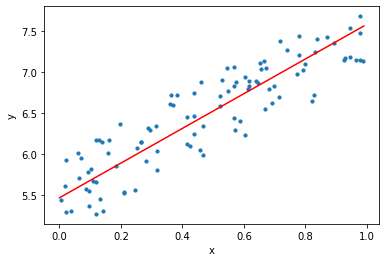

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# トイ・データセット
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)  # 省略可能

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    if i % 10 == 0:
        print(loss.data)

print('====')
print('W =', W.data)
print('b =', b.data)

# Plot
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

# ニューラルネットワーク